In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
import math

In [5]:
df = pd.read_csv("AirQuality.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7674 entries, 0 to 7673
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7674 non-null   int64  
 1   NMHC(GT)       7674 non-null   int64  
 2   C6H6(GT)       7674 non-null   float64
 3   PT08.S2(NMHC)  7674 non-null   int64  
 4   NOx(GT)        7674 non-null   int64  
 5   PT08.S3(NOx)   7674 non-null   int64  
 6   NO2(GT)        7674 non-null   int64  
 7   PT08.S4(NO2)   7674 non-null   int64  
 8   PT08.S5(O3)    7674 non-null   int64  
 9   T              7674 non-null   float64
 10  RH             7674 non-null   float64
 11  AH             7674 non-null   float64
 12  CO             7674 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 779.5 KB


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape)
print(y.shape)

(7674, 12)
(7674,)


#### Finding the two highly correlated Columns

In [22]:
attributes = X.corrwith(y).abs().sort_values().index[-2:]
feature1 = attributes[0]
feature2 = attributes[1]
target_col = df.columns[-1]
print(feature1, feature2)

PT08.S2(NMHC) C6H6(GT)


In [23]:
twoCol_X = pd.DataFrame()
for att in attributes:
    twoCol_X[att] = X[att]
twoCol_X

,PT08.S2(NMHC),C6H6(GT)
0,1046,11.9
1,955,9.4
2,939,9.0
3,948,9.2
4,836,6.5
...,...,...
7669,1101,13.5
7670,1027,11.4
7671,1063,12.4
7672,961,9.5


In [24]:
X_train,X_temp,y_train,y_temp = train_test_split(twoCol_X,y,train_size=0.6,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,train_size=0.5,random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4604, 2) (4604,)
(1535, 2) (1535,)
(1535, 2) (1535,)


### Multiple Linear Regression

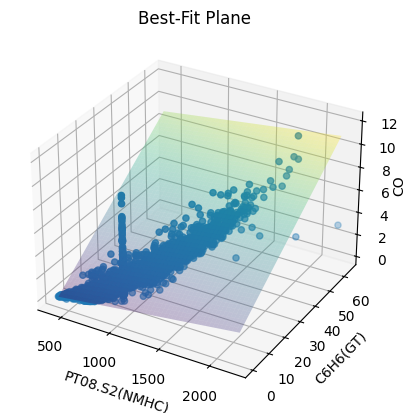

RMSE values:
Train:  0.6590788101407739
Validation:  0.6508930617955093
Test:  0.6025479239655136


In [61]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_train_pred_Linear = regressor.predict(X_train)
y_val_pred_Linear = regressor.predict(X_val)
y_test_pred_Linear = regressor.predict(X_test)

rmse_train = math.sqrt(mean_squared_error(y_train_pred_Linear,y_train))
rmse_val = math.sqrt(mean_squared_error(y_val_pred_Linear,y_val))
rmse_test = math.sqrt(mean_squared_error(y_test_pred_Linear,y_test))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train[feature1],X_train[feature2],y_train)

x_range = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 50)
y_range = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]
grid_points_df = pd.DataFrame(grid_points, columns=[feature1, feature2])

Z_grid = regressor.predict(grid_points_df)
Z_grid = Z_grid.reshape(X_grid.shape)

surface = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.3, edgecolor='none')

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col, rotation=90)
ax.zaxis.labelpad=-3.0
ax.set_title("Best-Fit Plane")
plt.show()
print('RMSE values:')
print("Train: ", rmse_train)
print("Validation: ", rmse_val)
print("Test: ", rmse_test)

Text(0.5, 1.0, 'Actual vs. Predicted "CO" values')

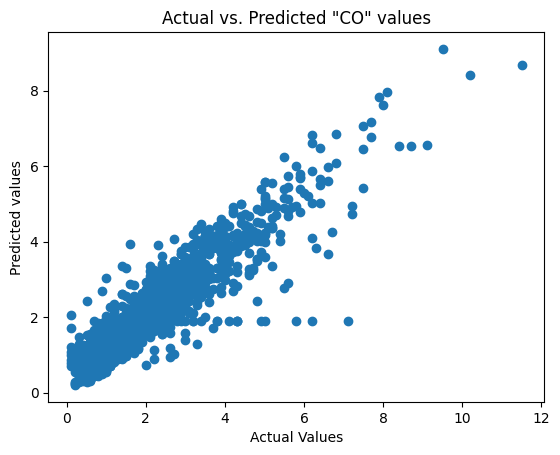

In [62]:
plt.scatter(y_test, y_test_pred_Linear)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title(f'Actual vs. Predicted "CO" values')

### Polynoial Regression

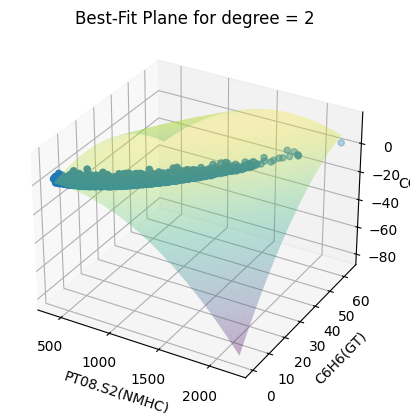

-----------------------------------------------------------------------------


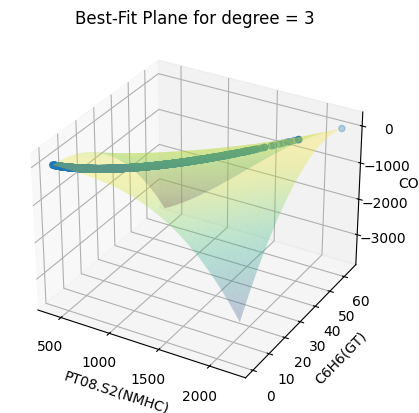

-----------------------------------------------------------------------------


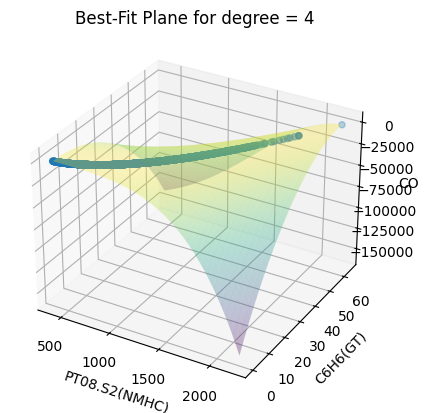

-----------------------------------------------------------------------------


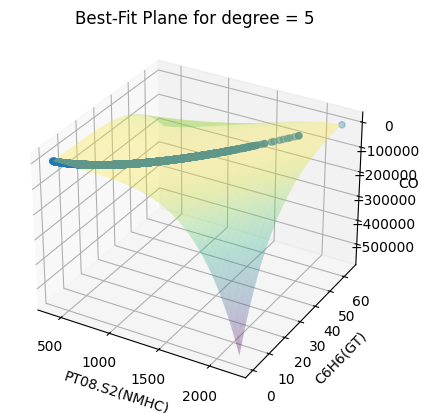

-----------------------------------------------------------------------------


In [138]:
degrees = [2,3,4,5]
min_ValRMSE = 10000
rmse_val_list = []
for d in degrees:
    polynomial = PolynomialFeatures(degree=d)
    X_train_transf = polynomial.fit_transform(X_train)
    X_val_transf = polynomial.transform(X_val)

    regressor = LinearRegression()
    regressor.fit(X_train_transf,y_train)

    y_train_pred_Poly = regressor.predict(X_train_transf)
    y_val_pred_Poly = regressor.predict(X_val_transf)

    rmse_train = math.sqrt(mean_squared_error(y_train_pred_Poly,y_train))
    rmse_val = math.sqrt(mean_squared_error(y_val_pred_Poly,y_val))

    rmse_val_list.append(rmse_val)

    if(rmse_val<min_ValRMSE):
        min_ValRMSE = rmse_val
        min_ErrorTransformer = polynomial
        min_ErrorRegressor = regressor

    # print(f'Best Regression Surface for degree = {d}')
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(sorted(X_train[feature1]),sorted(X_train[feature2]),y_train)

    x_range = np.linspace(X_train[feature1].min(),X_train[feature1].max(),50) 
    y_range = np.linspace(X_train[feature2].min(),X_train[feature2].max(),50)
    X_grid,Y_grid = np.meshgrid(x_range,y_range)

    grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
    grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
    grid_points_df_transf = polynomial.transform(grid_points_df)

    Z_grid = regressor.predict(grid_points_df_transf)
    Z_grid = Z_grid.reshape(X_grid.shape)

    ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.3, edgecolor='none')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target_col)
    ax.zaxis.labelpad=1.0
    ax.set_title(f'Best-Fit Plane for degree = {d}')
    plt.show()
    print("-----------------------------------------------------------------------------")

In [70]:
X_train_transf = min_ErrorTransformer.transform(X_train)
X_val_transf = min_ErrorTransformer.transform(X_val)
X_test_transf = min_ErrorTransformer.transform(X_test)

y_train_pred_Poly = min_ErrorRegressor.predict(X_train_transf)
y_val_pred_Poly = min_ErrorRegressor.predict(X_val_transf)
y_test_pred_Poly = min_ErrorRegressor.predict(X_test_transf)

rmse_train = math.sqrt(mean_squared_error(y_train_pred_Poly,y_train))
rmse_val = math.sqrt(mean_squared_error(y_val_pred_Poly,y_val))
rmse_test = math.sqrt(mean_squared_error(y_test_pred_Poly,y_val))

print("Best Degree = ", min_ErrorTransformer.degree)
print("RMSE Values for")
print("Train: ", rmse_train)
print("Validation: ", rmse_val)
print("Test: ", rmse_test)

Best Degree =  5
RMSE Values for
Train:  0.6425040542199687
Validation:  0.6441390911615844
Test:  1.9107878458508551


Text(0, 0.5, 'RMSE')

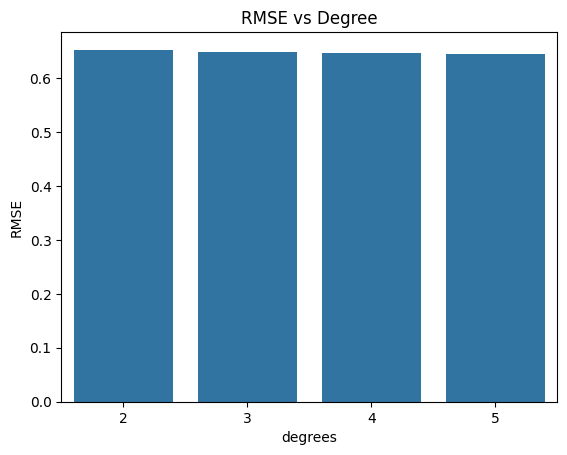

In [71]:
sns.barplot(x=degrees,y=rmse_val_list)
plt.title('RMSE vs Degree')
plt.xlabel('degrees')
plt.ylabel('RMSE')

Text(0.5, 1.0, 'Actual vs. Predicted "CO" values for the best polynomial degree 5')

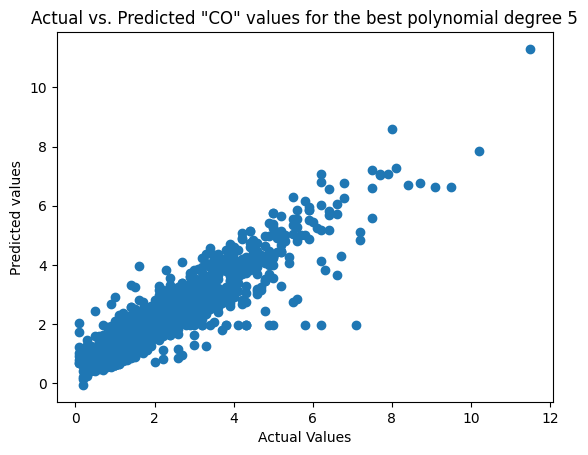

In [72]:
plt.scatter(y_test,y_test_pred_Poly)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title(f'Actual vs. Predicted "CO" values for the best polynomial degree {min_ErrorTransformer.degree}')

### Neural Networks

In [118]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size,hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size,1)       
        )
        self.hiddenlayer_size = hidden_size
    def forward(self,x):
        return self.layers(x)
    def hidden_size(self):
        return self.hiddenlayer_size

In [119]:
X_train_tensor,y_train_tensor = torch.tensor(X_train.values,dtype = torch.float32),torch.tensor(y_train.values,dtype = torch.float32).view(-1,1)
X_val_tensor,y_val_tensor = torch.tensor(X_val.values,dtype = torch.float32),torch.tensor(y_val.values,dtype = torch.float32).view(-1,1)
X_test_tensor,y_test_tensor = torch.tensor(X_test.values,dtype = torch.float32),torch.tensor(y_test.values,dtype = torch.float32).view(-1,1)

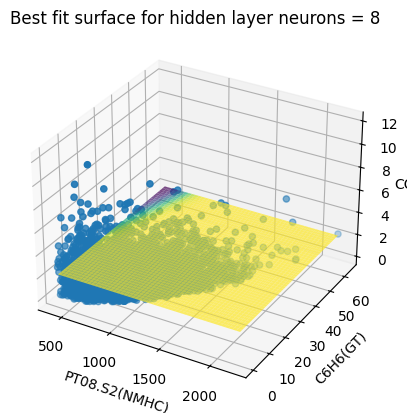

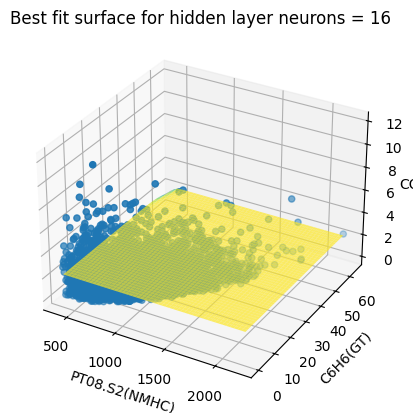

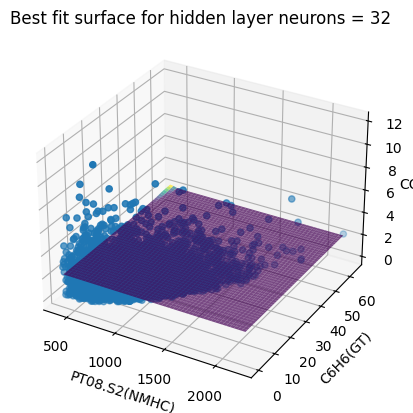

In [128]:
hidden_sizes = [8,16,32]
training_loss_list = []
min_ValRMSE = 10000
for h in hidden_sizes:

    model = NeuralNetwork(input_size=2,hidden_size=h)
    loss_function = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(),lr = 0.01)
    loss_list = []

    for i in range(1000):
        model.train()

        optimizer.zero_grad()
        output = model(X_train_tensor)
        
        loss = loss_function(output,y_train_tensor)
        loss_list.append(loss.item())
        
        loss.backward()
        optimizer.step()

    y_train_pred_NN = model(X_train_tensor)
    y_val_pred_NN = model(X_val_tensor)

    y_train_pred_NN = y_train_pred_NN.detach().numpy()
    y_val_pred_NN = y_val_pred_NN.detach().numpy()

    rmse_train = math.sqrt(mean_squared_error(y_train_pred_NN,y_train))
    rmse_val = math.sqrt(mean_squared_error(y_val_pred_NN,y_val))

    if (rmse_val<min_ValRMSE):
        min_ValRMSE = rmse_val
        min_ErrorNeuralNetwork = model
        training_loss_list = loss_list
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    ax.scatter(sorted(X_train[feature1]), sorted(X_train[feature2]), y_train)

    x_range = np.linspace(X_train[feature1].min(),X_train[feature1].max(),50)
    y_range = np.linspace(X_train[feature2].min(),X_train[feature2].max(),50)
    X_grid,Y_grid = np.meshgrid(x_range,y_range)

    grid_points = np.c_[X_grid.ravel(),Y_grid.ravel()]
    grid_points_df = pd.DataFrame(grid_points,columns=[feature1,feature2])
    grid_points_df_tensor = torch.tensor(grid_points_df.values,dtype = torch.float32)

    Z_grid = model(grid_points_df_tensor).detach().numpy()
    Z_grid = Z_grid.reshape(X_grid.shape)

    ax.plot_surface(X_grid,Y_grid,Z_grid,cmap='viridis', alpha=0.7)

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target_col)
    ax.set_title(f'Best fit surface for hidden layer neurons = {h}')
    ax.zaxis.labelpad=-1.0

In [132]:
y_train_pred_NN = min_ErrorNeuralNetwork(X_train_tensor).detach().numpy()
y_val_pred_NN = min_ErrorNeuralNetwork(X_val_tensor).detach().numpy()
y_test_pred_NN = min_ErrorNeuralNetwork(X_test_tensor).detach().numpy()

rmse_train = math.sqrt(mean_squared_error(y_train_pred_NN,y_train))
rmse_val = math.sqrt(mean_squared_error(y_val_pred_NN,y_val))
rmse_test = math.sqrt(mean_squared_error(y_test_pred_NN,y_test))

print("Best Neural Network model")
print("No. of hidden layer neurons = ", min_ErrorNeuralNetwork.hidden_size())
print('RMSE values for: ')
print("Train:", rmse_train)
print("Validation: ", rmse_val)
print("Test: ", rmse_test)

Best Neural Network model
No. of hidden layer neurons =  8
RMSE values for: 
Train: 1.4535447925973248
Validation:  1.4299156096779193
Test:  1.475133965893642


Text(0.5, 1.0, 'Training loss vs. Epochs for the Best Network 8')

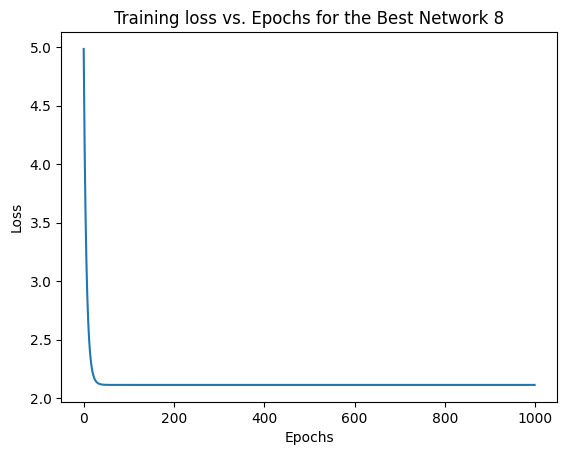

In [136]:
plt.plot(training_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f'Training loss vs. Epochs for the Best Network {min_ErrorNeuralNetwork.hidden_size()}')

Text(0.5, 1.0, 'Actual vs. Predicted "CO" values on Test Data')

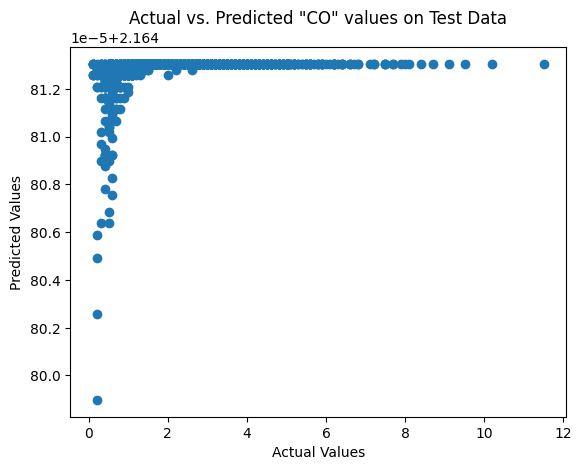

In [137]:
plt.scatter(y_test, y_test_pred_NN)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Actual vs. Predicted "CO" values on Test Data')